<a href="https://colab.research.google.com/github/qb4745/evaluacion_1_deep_learning/blob/main/evaluacion_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# MLP para Fashion MNIST
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Parámetros globales
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote para entrenamiento
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de carga de datos...
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: ...y los preprocesa para su uso en redes neuronales.
# Normalización: Escalar imágenes al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reformateo: Añadir dimensión de canal (necesario para Keras aunque sea 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# IL 1.2: (Relacionado) Preparación de etiquetas para función de error/salida 'categorical_crossentropy'/'softmax'
# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1: ...considerando los conceptos de Deep Learning, tales como Perceptrón, Perceptrón multicapa y Red Neuronal Artificial.
# IL 1.3: Programa algoritmos en lenguaje Python, utilizando Tensorflow mediante Keras... para optimizar un modelo... (MLP).
print("\nDefiniendo la arquitectura del modelo MLP...")
model = keras.Sequential(name="mlp_fashion_mnist")
# Capa de aplanamiento para convertir la imagen 2D en vector 1D para el MLP
model.add(layers.Flatten(input_shape=input_shape))

# IL 1.2: Programa funciones de activación... aplicada a redes neuronales...
# Capa oculta 1 con activación ReLU
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))

# IL 1.3: ...aplicando técnicas de optimización y regularización, como dropout...
# Capa Dropout para regularización
model.add(layers.Dropout(0.5, name="dropout_1"))

# Capa oculta 2 con activación ReLU
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2")) # Más Dropout

# IL 1.2: Programa funciones de... salida... aplicada a redes neuronales...
# Capa de salida con activación Softmax para clasificación multiclase
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

# Mostrar resumen de la arquitectura creada
model.summary()

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: ...para optimizar un modelo... (Selección de optimizador y tasa de aprendizaje)
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Programa funciones de... error... aplicada a redes neuronales...
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy... (Se especifica aquí)
model.compile(
    loss="categorical_crossentropy", # Función de error/pérdida
    optimizer=optimizer,             # Algoritmo de optimización
    metrics=["accuracy"]             # Métrica(s) a monitorizar
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de... entrenamiento de la red neuronal...
# Configura parámetros clave como épocas y tamaño de batch (definidos en Sección 1).
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa parte del training set para validación durante el entrenamiento
    verbose=2 # Muestra una línea por época
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy...
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0) # Evalúa en datos no vistos
print(f"Test loss: {score[0]:.4f}")
# Esta es la métrica 'accuracy' calculada en el conjunto de prueba
print(f"Test accuracy: {score[1]:.4f}")

# ===============================
# Fin del Script Principal
# ===============================

Cargando dataset Fashion MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 9s - 22ms/step - accuracy: 0.6636 - loss: 0.9395 - val_accuracy: 0.8173 - val_loss: 0.5097
Epoch 2/15
422/422 - 3s - 8ms/step - accuracy: 0.7929 - loss: 0.6031 - val_accuracy: 0.8370 - val_loss: 0.4360
Epoch 3/15
422/422 - 5s - 12ms/step - accuracy: 0.8136 - loss: 0.5408 - val_accuracy: 0.8433 - val_loss: 0.4166
Epoch 4/15
422/422 - 3s - 8ms/step - accuracy: 0.8245 - loss: 0.5056 - val_accuracy: 0.8550 - val_loss: 0.3911
Epoch 5/15
422/422 - 2s - 6ms/step - accuracy: 0.8306 - loss: 0.4834 - val_accuracy: 0.8585 - val_loss: 0.3799
Epoch 6/15
422/422 - 2s - 4ms/step - accuracy: 0.8367 - loss: 0.4653 - val_accuracy: 0.8617 - val_loss: 0.3759
Epoch 7/15
422/422 - 3s - 8ms/step - accuracy: 0.8421 - loss: 0.4546 - val_accuracy: 0.8577 - val_loss: 0.3762
Epoch 8/15
422/422 - 4s - 10ms/step - accuracy: 0.8434 - loss: 0.4451 - val_accuracy: 0.8665 - val_loss

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP (Baseline)...


Model: "mlp_fashion_mnist_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 4s - 9ms/step - accuracy: 0.6631 - loss: 0.9414 - val_accuracy: 0.8132 - val_loss: 0.5031
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.7850 - loss: 0.6072 - val_accuracy: 0.8427 - val_loss: 0.4376
Epoch 3/15
422/422 - 2s - 4ms/step - accuracy: 0.8100 - loss: 0.5463 - val_accuracy: 0.8455 - val_loss: 0.4094
Epoch 4/15
422/422 - 3s - 6ms/step - accuracy: 0.8199 - loss: 0.5116 - val_accuracy: 0.8570 - val_loss: 0.3870
Epoch 5/15
422/422 - 2s - 4ms/step - accuracy: 0.8277 - loss: 0.4909 - val_accuracy: 0.8547 - val_loss: 0.3859
Epoch 6/15
422/422 - 3s - 7ms/step - accuracy: 0.8350 - loss: 0.4725 - val_accuracy: 0.8602 - val_loss: 0.3834
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8401 - loss: 0.4591 - val_accuracy: 0.8638 - val_loss: 0.3662
Epoch 8/15
422/422 - 2s - 4ms/step - accuracy: 0.8419 - loss: 0.4505 - val_accuracy: 0.8643 - val_loss: 0

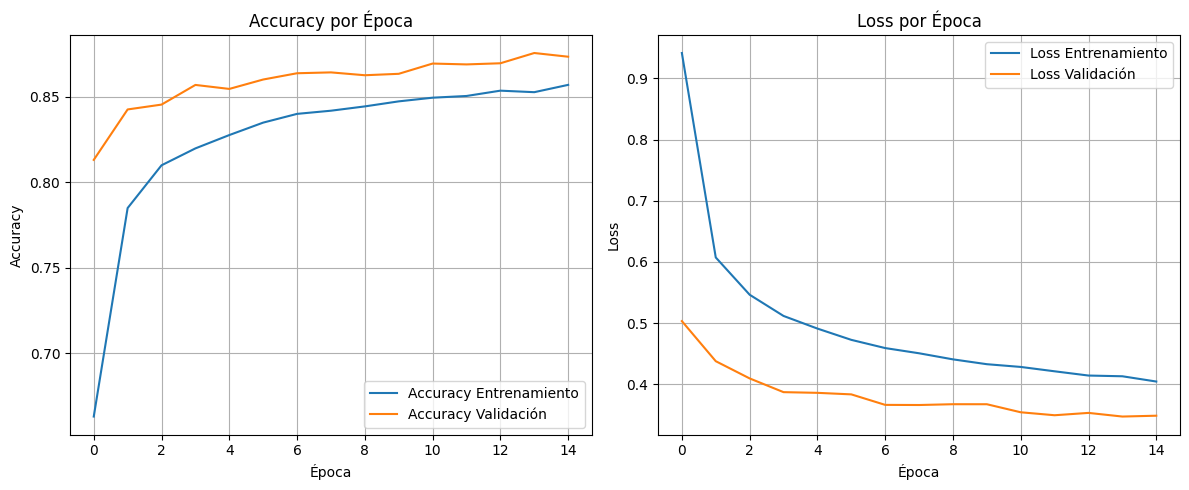


--- Fin del Script ---


In [2]:
# ===============================
# MLP para Fashion MNIST - Versión Mejorada para Cumplir ILs
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt # Añadido para visualización
from sklearn.metrics import classification_report # Añadido para métricas IL 1.4

# Parámetros globales (Estos son HIPERPARÁMETROS CLAVE para experimentar - IL 1.1, IL 1.3)
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam
dropout_rate = 0.5       # Tasa de Dropout (¡experimentar con este valor!)

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Carga de datos
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: Preprocesamiento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# Guardar copias de las etiquetas de prueba para evaluación posterior (IL 1.4)
y_test_labels = y_test.copy() # Guardar etiquetas originales (números 0-9)

# IL 1.2: Preparación de etiquetas para 'categorical_crossentropy'/'softmax'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1, IL 1.3: Implementación de un MLP usando Keras
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.2):**
#    - Para probar otras funciones de activación, cambia 'relu' por 'sigmoid', 'tanh', etc.
#    - Para probar diferentes arquitecturas, cambia el número de capas o neuronas (ej: 128 -> 256).
#    - Entrena un modelo por cada cambio y compara resultados.
print("\nDefiniendo la arquitectura del modelo MLP (Baseline)...")
model = keras.Sequential(name="mlp_fashion_mnist_baseline")
model.add(layers.Flatten(input_shape=input_shape))
# IL 1.2: Uso de función de activación 'relu'
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
# IL 1.3: Uso de técnica de regularización 'Dropout'
model.add(layers.Dropout(dropout_rate, name="dropout_1")) # ¡Experimenta con dropout_rate!
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(dropout_rate, name="dropout_2"))
# IL 1.2: Uso de función de activación/salida 'softmax'
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary() # Útil para verificar la estructura y número de parámetros

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: Selección de optimizador Adam
# **ACCIÓN REQUERIDA (Experimentación IL 1.3):**
#    - Prueba otros optimizadores (ej: keras.optimizers.SGD(learning_rate=...)).
#    - Ajusta el 'learning_rate'.
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Selección de función de error 'categorical_crossentropy'
# **ACCIÓN REQUERIDA (Experimentación IL 1.2):**
#    - Si usas etiquetas numéricas (no one-hot), podrías usar 'sparse_categorical_crossentropy'.
#    - Compara el impacto si cambias la función de error (aunque categorical_crossentropy es estándar aquí).
# IL 1.4: Especificación de métrica 'accuracy' (se añadirán otras en evaluación)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"] # Accuracy se calcula durante el entrenamiento/evaluación
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecución del entrenamiento
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.3):**
#    - Ejecuta este bloque con diferentes 'batch_size' y 'epochs'.
#    - Compara las curvas de aprendizaje (generadas más abajo) para cada experimento.
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa 10% para validación
    verbose=2
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación Detallada en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa desempeño con accuracy, precision, recall, F1-Score
print("\nEvaluando en conjunto de prueba:")
# Paso 1: Obtener Loss y Accuracy base con evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss (Pérdida): {score[0]:.4f}")
print(f"Test accuracy (Exactitud): {score[1]:.4f}")

# Paso 2: Obtener predicciones para calcular otras métricas
y_pred_prob = model.predict(x_test) # Obtiene probabilidades de salida
y_pred_classes = np.argmax(y_pred_prob, axis=1) # Convierte probabilidades a clase predicha (0-9)

# Paso 3: Calcular Precision, Recall, F1-Score usando classification_report
# Necesitamos las etiquetas de prueba originales (0-9), no las one-hot
print("\nReporte de Clasificación (Precision, Recall, F1-Score por clase y promedios):")
# y_test_labels fue guardada antes del one-hot encoding
print(classification_report(y_test_labels, y_pred_classes, digits=4))

# **ACCIÓN REQUERIDA (IL 1.4):**
#    - Crear un cuadro resumen en tu informe/notebook con Accuracy, Precision (promedio), Recall (promedio), F1-Score (promedio).
#    - Interpretar estas métricas: ¿Qué clases clasifica bien/mal? ¿Hay desbalance?
#    - Comparar estas métricas entre los diferentes modelos que entrenaste en tus experimentos.

# -------------------------------
# Sección 7: Visualización de Curvas de Aprendizaje (Análisis IL 1.1, IL 1.3)
# -------------------------------
# Útil para analizar el entrenamiento, detectar overfitting/underfitting y comparar experimentos
print("\nGenerando gráficos de curvas de aprendizaje...")
plt.figure(figsize=(12, 5))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Muestra los gráficos

# **ACCIÓN REQUERIDA (Análisis y Comparación IL 1.1, IL 1.3):**
#    - Analiza estas curvas: ¿Hay sobreajuste (gap grande entre train/val)? ¿El modelo converge?
#    - Guarda estos gráficos para cada experimento que realices (ej., con diferente tasa de dropout, diferente # de épocas, etc.).
#    - Presenta gráficos comparativos en tu informe/notebook para justificar cómo las técnicas de optimización (dropout) o los cambios de hiperparámetros afectaron el entrenamiento.

# ===============================
# Sección 8: Conclusiones y Próximos Pasos (Documentación)
# ===============================
# **ACCIÓN REQUERIDA:**
#    - En tu cuaderno Jupyter, añade una sección final de Markdown para:
#        - Resumir los resultados del MEJOR modelo encontrado tras la experimentación.
#        - Discutir los hallazgos clave (qué funcionó, qué no, impacto de parámetros).
#        - Comparar explícitamente diferentes configuraciones (tabla resumen es ideal).
#        - Justificar las decisiones finales de arquitectura e hiperparámetros.
#        - Reflexionar sobre posibles mejoras futuras.
#
# ¡Recuerda documentar CADA experimento que realices en tu cuaderno!
# ===============================

print("\n--- Fin del Script ---")

---

## 1. Introducción

Este proyecto aborda un problema práctico de clasificación de imágenes utilizando una Red Neuronal Artificial (RNA) de tipo Perceptrón Multicapa (MLP). El objetivo es aplicar los fundamentos de Deep Learning para entrenar un modelo capaz de identificar diferentes tipos de artículos de moda a partir de imágenes en escala de grises.

Para este propósito, utilizaremos el dataset **Fashion-MNIST**. Este conjunto de datos fue desarrollado por Zalando Research y se presenta como un reemplazo directo ("drop-in replacement") del clásico dataset MNIST de dígitos escritos a mano. Mientras que MNIST es un estándar ampliamente utilizado para la validación inicial de algoritmos de Machine Learning, Fashion-MNIST ofrece un desafío potencialmente mayor manteniendo la misma estructura y formato: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes, todas ellas en escala de grises y de tamaño 28x28 píxeles, distribuidas en 10 clases distintas.

La elección de Fashion-MNIST nos permite trabajar con un dataset estandarizado, bien conocido en la comunidad, pero que requiere que el modelo aprenda características más complejas que las presentes en los dígitos manuscritos. El objetivo final de este encargo es implementar, entrenar, optimizar y evaluar un MLP utilizando TensorFlow/Keras para clasificar correctamente las imágenes de artículos de moda de este dataset, cumpliendo con los indicadores de logro especificados en la evaluación.

*Fuente oficial del dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)*

## 2. Descripción del Dataset (Contenido)

El dataset Fashion-MNIST se compone de imágenes y sus correspondientes etiquetas de clase. A continuación, se detallan sus características principales:

*   **Dimensiones de la Imagen:** Cada imagen tiene una altura de 28 píxeles y un ancho de 28 píxeles, resultando en un total de 784 píxeles por imagen.
*   **Formato de Píxeles:** Las imágenes están en escala de grises. Cada píxel tiene asociado un único valor numérico entero que indica su nivel de oscuridad. Este valor varía entre 0 (blanco) y 255 (negro). Valores más altos representan píxeles más oscuros.
*   **Estructura de los Datos:** Cada Fila del Dataset representa una imagen:
    *   **Primera Columna:** Corresponde a la etiqueta de clase (un número del 0 al 9) que identifica el tipo de artículo de moda representado en la imagen.
    *   **Columnas Restantes (784):** Contienen los valores de los píxeles (0-255) de la imagen asociada, generalmente desplegados en un formato aplanado (vector de 784 elementos).
*   **Etiquetas de Clase:** Cada ejemplo (imagen) está asignado a una de las siguientes 10 clases, representadas por un número entero:

    *   `0`: T-shirt/top (Camiseta/Top)
    *   `1`: Trouser (Pantalón)
    *   `2`: Pullover (Suéter)
    *   `3`: Dress (Vestido)
    *   `4`: Coat (Abrigo)
    *   `5`: Sandal (Sandalia)
    *   `6`: Shirt (Camisa)
    *   `7`: Sneaker (Zapatilla deportiva)
    *   `8`: Bag (Bolso)
    *   `9`: Ankle boot (Botín)

**En resumen:** Cada fila del dataset representa una imagen de 28x28 píxeles en escala de grises, junto con una etiqueta numérica que indica a cuál de las 10 categorías de ropa pertenece. El objetivo del modelo será aprender a predecir esta etiqueta basándose en los 784 valores de píxeles de entrada.

---



---

## 3. Configuración del Entorno y Selección del Framework

Antes de proceder con la carga y preprocesamiento de los datos, es fundamental definir el entorno de trabajo y las herramientas principales que se utilizarán para la implementación de la Red Neuronal Artificial (MLP).

### 3.1. Elección del Framework: TensorFlow con Keras

Para el desarrollo de este proyecto, hemos seleccionado **TensorFlow (versión X.Y.Z)** como la biblioteca principal de Deep Learning, utilizando específicamente su interfaz de alto nivel **Keras**.

**Justificación de la Decisión:**

La elección de TensorFlow con Keras se basa en las siguientes consideraciones clave, alineadas con los objetivos de la evaluación y los requisitos del proyecto:

1.  **Facilidad de Uso y Desarrollo Rápido (API de Keras):** Keras proporciona una API intuitiva y modular que simplifica significativamente el proceso de definición, entrenamiento y evaluación de redes neuronales, incluyendo los MLP requeridos. Esto nos permite centrarnos en la aplicación de los conceptos fundamentales de Deep Learning (como la arquitectura del modelo, funciones de activación, optimizadores y métricas) en lugar de en detalles de implementación de bajo nivel.
2.  **Cumplimiento de Requisitos:** TensorFlow/Keras ofrece todas las componentes necesarias para abordar los Indicadores de Logro de esta evaluación:
    *   Capas densas para construir el MLP.
    *   Amplia variedad de funciones de activación  y la flexibilidad para definir funciones personalizadas si fuera necesario .
    *   Diversas funciones de pérdida adecuadas para problemas de clasificación.
    *   Múltiples algoritmos de optimización para entrenar y optimizar el modelo.
    *   Herramientas integradas para la evaluación del modelo y el cálculo de métricas.
3.  **Documentación Extensa y Comunidad Activa:** TensorFlow y Keras cuentan con una documentación oficial muy completa, numerosos tutoriales y una vasta comunidad de usuarios. Esto facilita la resolución de dudas y la consulta de ejemplos durante el desarrollo.
4.  **Integración con Ecosistema:** TensorFlow se integra fácilmente con otras herramientas útiles del ecosistema de Data Science en Python, como NumPy, Pandas y Scikit-learn (que utilizaremos para la carga y preprocesamiento de datos), así como con herramientas de visualización como Matplotlib/Seaborn y TensorBoard (para un análisis más profundo del entrenamiento, si se requiere).
5.  **Entorno de Ejecución (Google Colab):** TensorFlow está preinstalado y optimizado para su uso en Google Colab, el entorno recomendado para este proyecto, permitiendo aprovechar fácilmente los recursos de hardware como GPUs o TPUs para acelerar el entrenamiento si fuera necesario.

**En resumen**, la combinación TensorFlow/Keras representa un balance adecuado entre potencia, flexibilidad y facilidad de uso, lo que la convierte en una opción idónea para implementar eficientemente el MLP solicitado y cumplir con los objetivos de esta evaluación dentro del plazo establecido. Las siguientes secciones detallarán cómo se utiliza este framework para la carga, preprocesamiento, modelado y evaluación.

---

## Importación de Librerías

En esta sección, importamos las bibliotecas fundamentales que utilizaremos a lo largo del proyecto: NumPy para operaciones numéricas y Keras (parte de TensorFlow) para construir y entrenar nuestro modelo de red neuronal.

In [ ]:
import numpy as np
import keras
from keras import layers

## Preparando los Datos

In [ ]:
# Parámetros del modelo / datos
num_classes = 10 # Número de clases de salida (0-9)
input_shape = (28, 28, 1) # Forma de entrada para cada imagen (28x28 píxeles, 1 canal de color gris)

# Cargar los datos y dividirlos en conjuntos de entrenamiento y prueba
# ¡Importante! Usamos fashion_mnist en lugar de mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Escalar las imágenes al rango [0, 1]
# Convertimos los valores de píxeles (originalmente 0-255) a float32 y los normalizamos
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Asegurarse de que las imágenes tengan la forma (alto, ancho, canal)
# Añadimos una dimensión extra para el canal (aunque sea 1 para escala de grises)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Imprimir información sobre las dimensiones de los datos cargados
print("Forma de x_train:", x_train.shape)
print(x_train.shape[0], "muestras de entrenamiento")
print(x_test.shape[0], "muestras de prueba")

# Convertir los vectores de clase a matrices binarias de clase (one-hot encoding)
# Esto es necesario para usar la función de pérdida 'categorical_crossentropy'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forma de y_train (one-hot):", y_train.shape)
print("Ejemplo de y_train[0] (one-hot):", y_train[0])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de x_train: (60000, 28, 28, 1)
60000 muestras de entrenamiento
10000 muestras de prueba
Forma de y_train (one-hot): (60000, 10)
Ejemplo de y_train[0] (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 4. Definición del Modelo (Arquitectura CNN)
En esta sección, definimos la arquitectura de nuestra red neuronal utilizando la API Sequential de Keras. Nota: Este modelo es una Red Neuronal Convolucional (CNN), que incluye capas especializadas para procesar datos espaciales como las imágenes.

In [ ]:
model = keras.Sequential(
    [
        # Define la capa de entrada con la forma esperada para cada imagen
        keras.Input(shape=input_shape),
        # Primera capa convolucional: extrae 32 patrones usando filtros 3x3. ReLU activa las neuronas.
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # Capa de Max Pooling: reduce la dimensión espacial (a la mitad) para hacer el modelo más robusto y eficiente.
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Segunda capa convolucional: extrae 64 patrones más complejos de las características anteriores.
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # Segunda capa de Max Pooling.
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Capa de Aplanamiento: convierte los mapas de características 2D resultantes en un vector 1D.
        layers.Flatten(),
        # Capa Dropout: técnica de regularización. Apaga aleatoriamente el 50% de las neuronas durante el entrenamiento para prevenir el sobreajuste.
        layers.Dropout(0.5),
        # Capa Densa de Salida: capa totalmente conectada con 10 neuronas (una por clase).
        # La activación Softmax convierte las salidas en probabilidades para cada clase.
        layers.Dense(num_classes, activation="softmax"),
    ],
    name="modelo_cnn_fashion_mnist" # Es buena práctica darle un nombre al modelo
)

# Muestra un resumen de la arquitectura del modelo: capas, formas de salida y número de parámetros.
model.summary()

Model: "modelo_cnn_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compilación del Modelo
Antes de poder entrenar el modelo, necesitamos configurarlo mediante el método compile. Este paso define la función de pérdida que se minimizará, el optimizador que se usará para ajustar los pesos del modelo, y las métricas que queremos monitorizar durante el entrenamiento y la evaluación.

In [ ]:
# -------------------------------
# Compilación del modelo
# -------------------------------
# Definir el tamaño del lote y número de épocas
batch_size = 128  # Número de muestras procesadas antes de actualizar los pesos
epochs = 15       # Número de veces que el modelo verá el dataset completo

# Compilar el modelo especificando la función de pérdida, el optimizador y las métricas
model.compile(
    loss="categorical_crossentropy",  # Función de pérdida para clasificación multiclase
    optimizer="adam",                 # Optimizador Adam
    metrics=["accuracy"]             # Métrica a monitorear durante el entrenamiento
)

print("Modelo compilado con éxito.")

Modelo compilado con éxito.


## 6. Entrenamiento del Modelo
Una vez compilado, el modelo está listo para ser entrenado con los datos de entrenamiento (x_train, y_train) utilizando el método fit.


In [ ]:
# -------------------------------
# Entrenamiento del modelo
# -------------------------------
# Entrenar el modelo con los datos de entrenamiento
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  # Usar el 10% del set de entrenamiento para validación
)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9154 - loss: 0.2269 - val_accuracy: 0.9188 - val_loss: 0.2243
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9190 - loss: 0.2176 - val_accuracy: 0.9203 - val_loss: 0.2257
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9200 - loss: 0.2184 - val_accuracy: 0.9185 - val_loss: 0.2200
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9236 - loss: 0.2092 - val_accuracy: 0.9175 - val_loss: 0.2222
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9238 - loss: 0.2074 - val_accuracy: 0.9185 - val_loss: 0.2213
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9263 - loss: 0.2069 - val_accuracy: 0.9197 - val_loss: 0.2231
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9246 - loss: 0.2064 - val_accuracy: 0.9193 - val_loss: 0.2239
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9251 - loss: 0.2040 - 

## 7. Evaluación del Modelo en el Conjunto de Prueba
Una vez que el modelo ha sido entrenado, el siguiente paso crucial es evaluar su rendimiento en el conjunto de prueba (x_test, y_test). Este conjunto contiene datos que el modelo no ha visto durante el proceso de entrenamiento ni durante la fase de validación (si se usó validation_split en fit). Esta evaluación nos proporciona una estimación imparcial de cómo se espera que el modelo generalice a nuevos datos desconocidos.

In [ ]:
# Evaluar el modelo entrenado utilizando el conjunto de prueba
print("Evaluando el modelo en el conjunto de prueba...")
score = model.evaluate(x_test,  # Imágenes del conjunto de prueba
                       y_test,  # Etiquetas verdaderas del conjunto de prueba (one-hot)
                       verbose=0) # verbose=0 para modo silencioso (sin barra de progreso)

# Imprimir las métricas resultantes: pérdida y exactitud (accuracy)
# score[0] contiene el valor de la función de pérdida (loss)
# score[1] contiene el valor de la métrica 'accuracy' (definida en compile)
print(f"Pérdida en el conjunto de prueba (Test loss): {score[0]:.4f}")
print(f"Exactitud en el conjunto de prueba (Test accuracy): {score[1]:.4f}")


Evaluando el modelo en el conjunto de prueba...
Pérdida en el conjunto de prueba (Test loss): 0.2407
Exactitud en el conjunto de prueba (Test accuracy): 0.9128


In [ ]:
# ===============================
# MLP para Fashion MNIST
# ===============================

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# -------------------------------
# Parámetros globales
# -------------------------------
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje para el optimizador

# -------------------------------
# Carga y preprocesamiento de datos
# -------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Escalar imágenes a rango [0,1] y añadir dimensión de canal
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"x_train shape: {x_train.shape}, {x_train.shape[0]} muestras")
print(f"x_test  shape: {x_test.shape}, {x_test.shape[0]} muestras")

# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# -------------------------------
# Definición del modelo MLP
# -------------------------------
model = keras.Sequential(name="mlp_fashion_mnist")
model.add(layers.Flatten(input_shape=input_shape))  # Aplanar entrada
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
model.add(layers.Dropout(0.5, name="dropout_1"))
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2"))
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary()

# -------------------------------
# Compilación del modelo
# -------------------------------
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
print("Modelo compilado con éxito.")

# -------------------------------
# Entrenamiento del modelo
# -------------------------------
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=2
)

# -------------------------------
# Evaluación en el conjunto de prueba
# -------------------------------
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")


x_train shape: (60000, 28, 28, 1), 60000 muestras
x_test  shape: (10000, 28, 28, 1), 10000 muestras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Modelo compilado con éxito.
Epoch 1/15
422/422 - 62s - 147ms/step - accuracy: 0.6739 - loss: 0.9229 - val_accuracy: 0.8172 - val_loss: 0.4948
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.7898 - loss: 0.6046 - val_accuracy: 0.8352 - val_loss: 0.4538
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8088 - loss: 0.5433 - val_accuracy: 0.8507 - val_loss: 0.4133
Epoch 4/15
422/422 - 3s - 6ms/step - accuracy: 0.8237 - loss: 0.5066 - val_accuracy: 0.8553 - val_loss: 0.3996
Epoch 5/15
422/422 - 3s - 8ms/step - accuracy: 0.8312 - loss: 0.4832 - val_accuracy: 0.8553 - val_loss: 0.3947
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.8351 - loss: 0.4671 - val_accuracy: 0.8652 - val_loss: 0.3749
Epoch 7/15
422/422 - 2s - 6ms/step - accuracy: 0.8414 - loss: 0.4581 - val_accuracy: 0.8648 - val_loss: 0.3676
Epoch 8/15
422/422 - 3s - 6ms/step - accuracy: 0.8449 - loss: 0.4383 - val_accuracy: 0.8657 - val_loss: 0.3635
Epoch 9/15
422/422 - 2s - 5ms/step - accuracy: 0.8471 - loss: 0.4368 - val_accura

## Entre los dos resultados:

| Enfoque | Test Loss | Test Accuracy |
|---------|-----------|---------------|
| **CNN** | 0.2407    | **0.9128**    |
| **MLP** | 0.3717    | 0.8669        |

- **Exactitud (accuracy)**: la CNN alcanza un 91.28 %, frente al 86.69 % del MLP, es decir una ganancia de ≈ 4.6 puntos porcentuales.  
- **Pérdida (loss)**: la CNN obtiene un valor más bajo (0.2407 vs 0.3717), lo que indica que sus predicciones están más cercanas a las distribuciones reales de las clases.

**Conclusión:** la arquitectura **CNN** ofrece mejores métricas en clasificación de Fashion MNIST, gracias a su capacidad de explotar las estructuras espaciales de las imágenes (convoluciones y pooling) antes de llegar a la capa densa final. Si tu objetivo es maximizar precisión en datos de imagen, la CNN es la opción más adecuada.

---

## Mejorando el Modelo

Para superar el ~91 % de accuracy en Fashion MNIST con una CNN básica, puedes probar varias de estas estrategias (idealmente combinándolas):  

1. **Aumentar y diversificar los datos (Data Augmentation)**  
   - Aplica transformaciones aleatorias durante el entrenamiento: rotaciones pequeñas, desplazamientos, zoom, flips horizontales.  
   - Esto ayuda al modelo a generalizar mejor ante variaciones que no están en el set original.  

   ```python
   from tensorflow.keras.preprocessing.image import ImageDataGenerator

   datagen = ImageDataGenerator(
       rotation_range=10,
       width_shift_range=0.1,
       height_shift_range=0.1,
       zoom_range=0.1,
       horizontal_flip=True
   )
   datagen.fit(x_train)
   # Luego, en lugar de model.fit, usas:
   model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
             epochs=epochs,
             validation_data=(x_test, y_test))
   ```

2. **Batch Normalization**  
   - Inserta `layers.BatchNormalization()` tras cada Convolution + ReLU.  
   - Estabiliza y acelera el entrenamiento, permitiendo tasas de aprendizaje más altas y mejor convergencia.

3. **Arquitectura más profunda o ancha**  
   - Añade una tercera o cuarta capa conv + pooling, aumentando progresivamente los filtros (por ejemplo, 128 filtros en la tercera).  
   - Prueba también colocar una capa densa intermedia antes del softmax (por ejemplo 256 → 128 neuronas).

4. **Regularización extra**  
   - Ajusta el `Dropout` en cada bloque conv (ej. 0.25) y en las densas (ej. 0.5).  
   - Considera añadir L2 weight decay en el optimizador:  
     ```python
     optimizer = keras.optimizers.Adam(learning_rate, decay=1e-4)
     ```

5. **Scheduler de tasa de aprendizaje**  
   - Empieza con LR = 1e-3 y reduce en “plateau” (p.ej. factor 0.5 tras 3 épocas sin mejora).  
   - O usa un ciclo de learning rate (CosineAnnealing, OneCycle).

6. **Early Stopping y Checkpointing**  
   - Monitorea la validación y guarda el mejor modelo para evitar overfitting.  
   - Ejemplo:
     ```python
     callbacks = [
       keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5),
       keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
     ]
     model.fit(..., callbacks=callbacks)
     ```

7. **Ensemble de modelos**  
   - Entrena varias arquitecturas (o con diferentes inicializaciones) y promedia sus predicciones.  
   - Suele dar un pequeño “boost” adicional en accuracy.

8. **Transfer Learning ligero**  
   - Aunque Fashion MNIST es muy diferente de ImageNet, puedes probar usar un bloque convolucional preentrenado (ej. MobileNetV2) y adaptar sus primeras capas, sustituyendo la parte final por densas custom.

–––

**Recomendación de orden de experimentos (controlados):**  

1. Empieza por añadir **BatchNorm** y **ReduceLROnPlateau**.  
2. Incorpora **data augmentation** y observa mejora de val_accuracy.  
3. Prueba una capa conv extra o más filtros.  
4. Ajusta dropout / L2 para equilibrar over/underfitting.  
5. Si aún quieres exprimir más, combina dos o más modelos en **ensemble**.



Data Augmentation para generar ejemplos variados.

Batch Normalization para estabilizar el entrenamiento.

Dropout más estratégico para evitar overfitting.

Capas adicionales para aprender patrones más complejos.

Callbacks: ReduceLROnPlateau y EarlyStopping para entrenar de forma más eficiente.





In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------
# 1. Carga y preprocesamiento de datos
# -------------------------------
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# -------------------------------
# 2. Data Augmentation
# -------------------------------
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# -------------------------------
# 3. Modelo CNN mejorado
# -------------------------------
model = keras.Sequential([
    keras.Input(shape=input_shape),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
], name="cnn_fashionmnist_improved")

model.summary()

# -------------------------------
# 4. Compilación y entrenamiento con callbacks
# -------------------------------
batch_size = 128
epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

# -------------------------------
# 5. Evaluación final
# -------------------------------
print("\nEvaluando el modelo en el conjunto de prueba...")
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba (Test loss): {score[0]:.4f}")
print(f"Exactitud en el conjunto de prueba (Test accuracy): {score[1]:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "cnn_fashionmnist_improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,330 (1.50 MB)

 Trainable params: 391,370 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 346ms/step - accuracy: 0.6172 - loss: 1.1608 - val_accuracy: 0.6764 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 356ms/step - accuracy: 0.7757 - loss: 0.5961 - val_accuracy: 0.8412 - val_loss: 0.4320 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 349ms/step - accuracy: 0.8082 - loss: 0.5148 - val_accuracy: 0.8602 - val_loss: 0.3735 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 170s 362ms/step - accuracy: 0.8268 - loss: 0.4597 - val_accuracy: 0.8566 - val_loss: 0.3833 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 164s 350ms/step - accuracy: 0.8353 - loss: 0.4435 - val_accuracy: 0.8248 - val_loss: 0.5251 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 351ms/step - accuracy: 0.8434 - loss: 0.4217 - val_accuracy: 0.8828 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 168s 358ms/step - accura